In [1]:
#Importing the necessary libraries for our analysis

import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Begin by downloading all the csv files from https://cycling.data.tfl.gov.uk/ and save them in the same directory. 
#Call glob to find all files. 

all_files = glob('bike_data/*JourneyDataExtract*.csv')

In [3]:
#Concatenate all files in one single dataframe. 

bike_data = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in all_files), ignore_index = True)

In [4]:
#inspect the new dataframe:

bike_data.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,filename
0,73768697,1620,7457,10/03/2018 12:41,807,"Bevington Road West, North Kensington",10/03/2018 12:14,647,"Richmond Way, Shepherd's Bush",bike_data\100JourneyDataExtract07Mar2018-13Mar...
1,73703818,180,10899,07/03/2018 15:14,446,"York Hall, Bethnal Green",07/03/2018 15:11,722,"Finnis Street, Bethnal Green",bike_data\100JourneyDataExtract07Mar2018-13Mar...
2,73729421,1020,4813,08/03/2018 13:57,159,"Great Marlborough Street, Soho",08/03/2018 13:40,797,"Ossulston Street, Somers Town",bike_data\100JourneyDataExtract07Mar2018-13Mar...
3,73749828,240,8307,09/03/2018 08:57,578,"Hollybush Gardens, Bethnal Green",09/03/2018 08:53,719,"Victoria Park Road, Hackney Central",bike_data\100JourneyDataExtract07Mar2018-13Mar...
4,73822143,240,8433,13/03/2018 07:00,578,"Hollybush Gardens, Bethnal Green",13/03/2018 06:56,719,"Victoria Park Road, Hackney Central",bike_data\100JourneyDataExtract07Mar2018-13Mar...


In [5]:
#dropping the filename identifier column: 

bike_data.drop(['filename'], axis = 1, inplace = True)

In [6]:
#The Dates are stored as strings. We use the datetime.strptime function to convert these string objects into date objects

#Define a function to carry out conversions:

def str_to_time(str): 
  
    return datetime.strptime(str, "%d/%m/%Y %H:%M")

In [7]:
#apply the userdefined function above to convert the dates

bike_data['Start Date'] = bike_data['Start Date'].apply(str_to_time)
bike_data['End Date'] = bike_data['End Date'].apply(str_to_time)

In [8]:
#Create a new column "DateTime" that is simply the "Start Time" rounded to the nearest hour

bike_data['DateTime'] = bike_data['Start Date'].dt.round('H')

In [9]:
#Investigate other variable types and change them accordingly:

bike_data.describe()

,Rental Id,Duration,Bike Id,EndStation Id,StartStation Id
count,1.050036e+07,1.050036e+07,1.050036e+07,1.050036e+07,1.050036e+07
mean,7.778623e+07,1.196721e+03,8.231941e+03,3.673223e+02,3.693904e+02
std,3.165147e+06,3.490948e+03,4.645808e+03,2.410667e+02,2.408021e+02
min,7.229081e+07,6.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.505265e+07,4.800000e+02,4.229000e+03,1.600000e+02,1.620000e+02
50%,7.779078e+07,8.400000e+02,8.304000e+03,3.300000e+02,3.340000e+02
75%,8.052135e+07,1.260000e+03,1.252800e+04,5.730000e+02,5.740000e+02
max,8.327015e+07,5.671800e+05,1.638200e+04,8.390000e+02,8.390000e+02


In [10]:
#Converting variables to appropriate data types:

bike_data['Rental Id'] = bike_data['Rental Id'].astype('category')
bike_data['Bike Id'] = bike_data['Bike Id'].astype('category')
bike_data['EndStation Id'] = bike_data['EndStation Id'].astype('category')
bike_data['StartStation Id'] = bike_data['StartStation Id'].astype('category')

In [11]:
bike_data.describe()

,Duration
count,1.050036e+07
mean,1.196721e+03
std,3.490948e+03
min,6.000000e+01
25%,4.800000e+02
50%,8.400000e+02
75%,1.260000e+03
max,5.671800e+05


In [12]:
bike_data.head(3)

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,DateTime
0,73768697,1620,7457,2018-03-10 12:41:00,807,"Bevington Road West, North Kensington",2018-03-10 12:14:00,647,"Richmond Way, Shepherd's Bush",2018-03-10 12:00:00
1,73703818,180,10899,2018-03-07 15:14:00,446,"York Hall, Bethnal Green",2018-03-07 15:11:00,722,"Finnis Street, Bethnal Green",2018-03-07 15:00:00
2,73729421,1020,4813,2018-03-08 13:57:00,159,"Great Marlborough Street, Soho",2018-03-08 13:40:00,797,"Ossulston Street, Somers Town",2018-03-08 14:00:00


In [13]:
bike_data.tail(3)

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,DateTime
10500356,73672144,300,9190,2018-03-06 08:44:00,428,"Exhibition Road, Knightsbridge",2018-03-06 08:39:00,303,"Albert Gate, Hyde Park",2018-03-06 09:00:00
10500357,73670772,1020,9195,2018-03-06 08:38:00,564,"Somerset House, Strand",2018-03-06 08:21:00,303,"Albert Gate, Hyde Park",2018-03-06 08:00:00
10500358,73682740,120,6895,2018-03-06 17:00:00,303,"Albert Gate, Hyde Park",2018-03-06 16:58:00,303,"Albert Gate, Hyde Park",2018-03-06 17:00:00


In [14]:
#Total duration of rentals in 2018:

bike_data['Duration'].sum()/3600

3490556.85

## Statistics of the yearly average number of rentals per bike:

In [15]:
#Statistics of the yearly average number of rentals per bike:

bike_data[['Rental Id', 'Bike Id']].groupby(
    'Bike Id').count()['Rental Id'].describe().round(0)

count    12939.0
mean       812.0
std        266.0
min          1.0
25%        714.0
50%        874.0
75%        978.0
max       1480.0
Name: Rental Id, dtype: float64

In [16]:
rentals_per_bike = bike_data[['Rental Id', 'Bike Id']].groupby('Bike Id').count()['Rental Id']

Text(0, 1100, 'median = 858 rentals per bike')

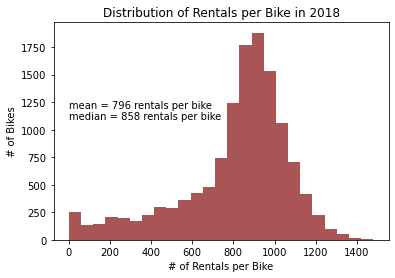

In [17]:
n, bins, patches = plt.hist(rentals_per_bike, 25, color = 'maroon', alpha = 0.666)
plt.xlabel('# of Rentals per Bike')
plt.ylabel('# of Bikes')
plt.title('Distribution of Rentals per Bike in 2018')
plt.text(0, 1200, 'mean = 796 rentals per bike')
plt.text(0, 1100, 'median = 858 rentals per bike')

# Statistics of the average duration of rentals per bike

In [18]:
bike_data[['Bike Id', 'Duration']].groupby('Bike Id').mean().describe()

,Duration
count,12939.000000
mean,1194.737768
std,217.497265
min,60.000000
25%,1103.961230
50%,1169.914367
75%,1253.787879
max,15811.578947


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001339DE689A0>]],
      dtype=object)

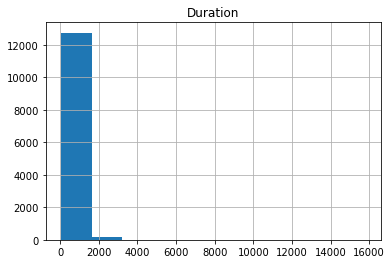

In [19]:
bike_data[['Bike Id', 'Duration']].groupby('Bike Id').mean().hist()

In [20]:
# An aggressive outlier can be observed in the rental duration data, clocking 15811 seconds on average, 
# compared to the median value of 1169 seconds. 

In [21]:
# Subset the dataset to include only realistic values
# Removes incidents where client fails to redock the bike, etc.. 

bike_data = bike_data[(bike_data['Duration'] < 30000) & (bike_data['Duration'] > 120)]

In [22]:
#New duration data with outlier removed:

mean_duration = pd.DataFrame(bike_data[['Bike Id', 'Duration']].groupby('Bike Id').mean().sort_values(by = 'Duration'))
mean_duration = mean_duration.reset_index()


C:\Users\philg\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\philg\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(870, 1000, 'mean = 1130 seconds')

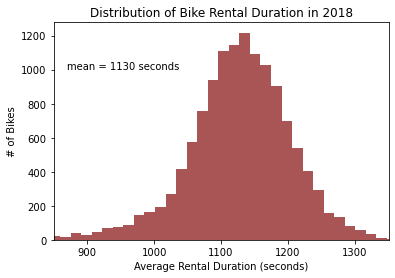

In [23]:
#Mean duration per bike 

import matplotlib.pyplot as plt

n, bins, patches = plt.hist(mean_duration['Duration'], 150, color = 'maroon', alpha = .666)
plt.xlim(850,1350)
plt.xlabel('Average Rental Duration (seconds)')
plt.ylabel('# of Bikes')
plt.title('Distribution of Bike Rental Duration in 2018')
plt.text(870, 1000, 'mean = 1130 seconds')
#plt.text(0, 1100, 'median = 858 rentals per bike')

## Famous Pickup and Dropoff Locations

In [24]:
# most frequently used pick up stations
bike_data[['Rental Id', 'StartStation Name']].groupby('StartStation Name').count().sort_values(by='Rental Id', ascending = False).head()

,Rental Id
StartStation Name,
"Belgrove Street , King's Cross",91610
"Hyde Park Corner, Hyde Park",84989
"Waterloo Station 3, Waterloo",80201
"Albert Gate, Hyde Park",61233
"Black Lion Gate, Kensington Gardens",60949


In [25]:
#famous = bike_data[bike_data['StartStation Name'].isin(['Belgrove Street , King\'s Cross', 'Hyde Park Corner, Hyde Park', 
# 'Waterloo Station 3, Waterloo', 'Albert Gate, Hyde Park', 'Black Lion Gate, Kensington Gardens'])]

In [26]:
#famous.to_csv('famous_stations.csv', index = False, header = True)

In [27]:
pickup = pd.DataFrame(bike_data[['Rental Id', 'StartStation Name']].groupby('StartStation Name').count().sort_values(by='Rental Id', ascending = False).head(10))

In [28]:
pickup.reset_index(inplace = True)
pickup = pickup.sort_values('Rental Id')


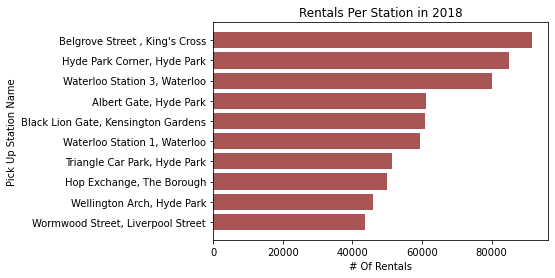

In [29]:

x = pickup['StartStation Name']
y = pickup['Rental Id']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, y,color = 'maroon', alpha = 0.666)
plt.ylabel("Pick Up Station Name")
plt.xlabel("# Of Rentals")
plt.title("Rentals Per Station in 2018")

plt.yticks(x_pos, x)

plt.show()

In [30]:
# most frequently used drop off stations
bike_data[['Rental Id', 'EndStation Name']].groupby('EndStation Name').count().sort_values(by='Rental Id', ascending = False).head(10)

,Rental Id
EndStation Name,
"Belgrove Street , King's Cross",89658
"Hyde Park Corner, Hyde Park",85073
"Waterloo Station 3, Waterloo",76736
"Hop Exchange, The Borough",66995
"Albert Gate, Hyde Park",61666
"Black Lion Gate, Kensington Gardens",60297
"Waterloo Station 1, Waterloo",58008
"Holborn Circus, Holborn",53303
"Brushfield Street, Liverpool Street",52731


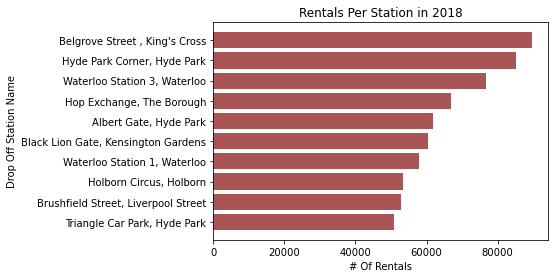

In [31]:
dropoff = pd.DataFrame(bike_data[['Rental Id', 'EndStation Name']].groupby('EndStation Name').count().sort_values(by='Rental Id', ascending = False).head(10))
dropoff.reset_index(inplace = True)
dropoff = dropoff.sort_values('Rental Id')
x = dropoff['EndStation Name']
y = dropoff['Rental Id']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, y, color = 'maroon', alpha = 0.666)
plt.ylabel("Drop Off Station Name")
plt.xlabel("# Of Rentals")
plt.title("Rentals Per Station in 2018")

plt.yticks(x_pos, x)

plt.show()



## Time Averages

In [32]:
#monthly rentals
y = bike_data[['DateTime', 'Rental Id']].groupby(bike_data['DateTime'].dt.month).count()['Rental Id']
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0.5, 1.0, 'Total Number of Rentals per Month 2018')

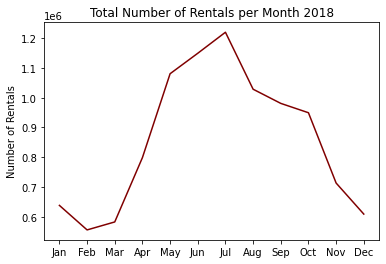

In [33]:
plt.plot(x, y, color = 'maroon')
plt.ylabel('Number of Rentals')
plt.title("Total Number of Rentals per Month 2018")

Text(0.5, 1.0, 'Total Number of Rentals per Week 2018')

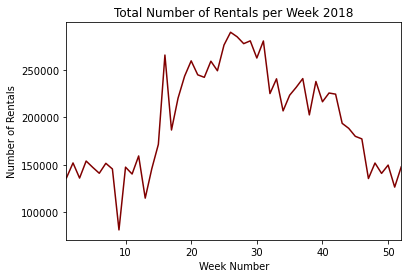

In [34]:
#weekly rentals
bike_data[['DateTime', 'Rental Id']].groupby(bike_data['DateTime'].dt.week).count()['Rental Id'].plot(color = 'maroon')
plt.ylabel("Number of Rentals")
plt.xlabel("Week Number")
plt.title("Total Number of Rentals per Week 2018")

## Average duration between pick ups per bike

In [35]:
#Subset the dataset to only select Bike Id, Start and End times for each rental:

bike_data_time = bike_data[['Bike Id', 'Start Date', 'End Date']]

In [36]:
# Perform a 2 level sort, first sort by bike Id, then sort by Start Time of rental:

bike_data_time = bike_data_time.sort_values(['Bike Id', 'Start Date'])

In [37]:
# The new dataframe shows each rental and subsequent rental for each bike:
bike_data_time

,Bike Id,Start Date,End Date
9220730,1,2018-01-01 13:37:00,2018-01-01 13:59:00
9357037,1,2018-01-06 10:47:00,2018-01-06 11:11:00
9324313,1,2018-01-06 14:30:00,2018-01-06 14:39:00
9350269,1,2018-01-06 14:45:00,2018-01-06 14:57:00
9246190,1,2018-01-07 04:20:00,2018-01-07 04:34:00
...,...,...,...
9106476,16382,2018-12-30 20:42:00,2018-12-30 21:01:00
9140911,16382,2018-12-30 22:08:00,2018-12-30 22:42:00
9120445,16382,2018-12-31 16:43:00,2018-12-31 16:55:00
9094269,16382,2018-12-31 18:45:00,2018-12-31 19:02:00


In [38]:
# Elegantly calculate the time between consecutive rentals for each bike by shifting the the dataframe
# And calculating the time difference between the "next" Start date and the "previous" End date in seconds

time_delta = (bike_data_time.shift(-1)['Start Date'] - bike_data_time['End Date'])/ np.timedelta64(1, 's')

In [39]:
# Construct a dataframe that only contains these time deltas:

df_time_delta = pd.DataFrame({'Bike Id': bike_data_time['Bike Id'], 'Delta': time_delta})

In [40]:
df_time_delta.head()

,Bike Id,Delta
9220730,1,420480.0
9357037,1,11940.0
9324313,1,360.0
9350269,1,48180.0
9246190,1,27060.0


In [41]:
# Consider "normal" business hours deltas... i.e. remove overnight deltas and any unrealistic deltas and any incidents
# where a bike may have been taken out of commission for a while. Limit time delta to only 40,000 seconds:


df_time_delta = df_time_delta[(df_time_delta['Delta'] < 40000) & (df_time_delta['Delta'] > 0)]

In [42]:
df_time_delta.head()

,Bike Id,Delta
9357037,1,11940.0
9324313,1,360.0
9246190,1,27060.0
9318319,1,18000.0
9235724,1,33120.0


In [43]:
# Statistics of time deltas per bike:

df_time_delta[['Bike Id', 'Delta']].groupby('Bike Id').mean().describe()

,Delta
count,12935.000000
mean,8881.753857
std,797.397003
min,180.000000
25%,8486.526216
50%,8860.071813
75%,9249.551979
max,30840.000000


C:\Users\philg\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\philg\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(6200, 1500, 'mean = 8830 seconds')

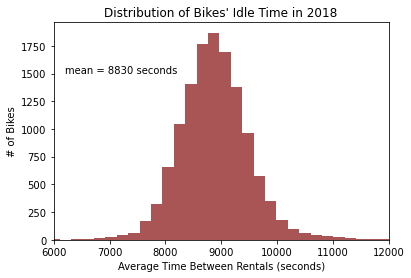

In [44]:
n, bins, patches = plt.hist(df_time_delta[['Bike Id', 'Delta']].groupby('Bike Id').mean()['Delta'], 
                            150, color = 'maroon', alpha =0.666)
plt.xlim(6000,12000)
plt.xlabel('Average Time Between Rentals (seconds)')
plt.ylabel('# of Bikes')
plt.title('Distribution of Bikes\' Idle Time in 2018')
plt.text(6200, 1500, 'mean = 8830 seconds')
#plt.text(0, 1100, 'median = 858 rentals per bike')
